# Project: Investigate a TMDb Dataset as part of Udacity Data Analysis Nanodegree Program. 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Most of us have watched movies since childhood and the fascination of movies continues even to this day. Most of the movie companies these days base various aspects of their production based on data, trends and findings. As part of this analysis, we try to determine some critical questions based on the data provided in the dataset. Some of the questions that will be answered are listed below.

## Questions to be answered
<ul>
<li>Which month is considered best for releasing movies and does number of releases align with highest grossing months</li>
<li>Which genres have the highest revenues for their movies</li>
<li>What are the top 5 genres in terms of the production of movies</li>
<li>Does runtime and vote count have a relationship with vote average</li>

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Explore General Properties

In [151]:
#Load the data from the dataset using Pandas and investigate the first few rows
tmdb = pd.read_csv('tmdb-movies.csv')
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [153]:
#Gather some info about this dataset
tmdb.info()

print('This dataset has {} rows and {} columns'.format(tmdb.shape[0], tmdb.shape[1]))

tmdb.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

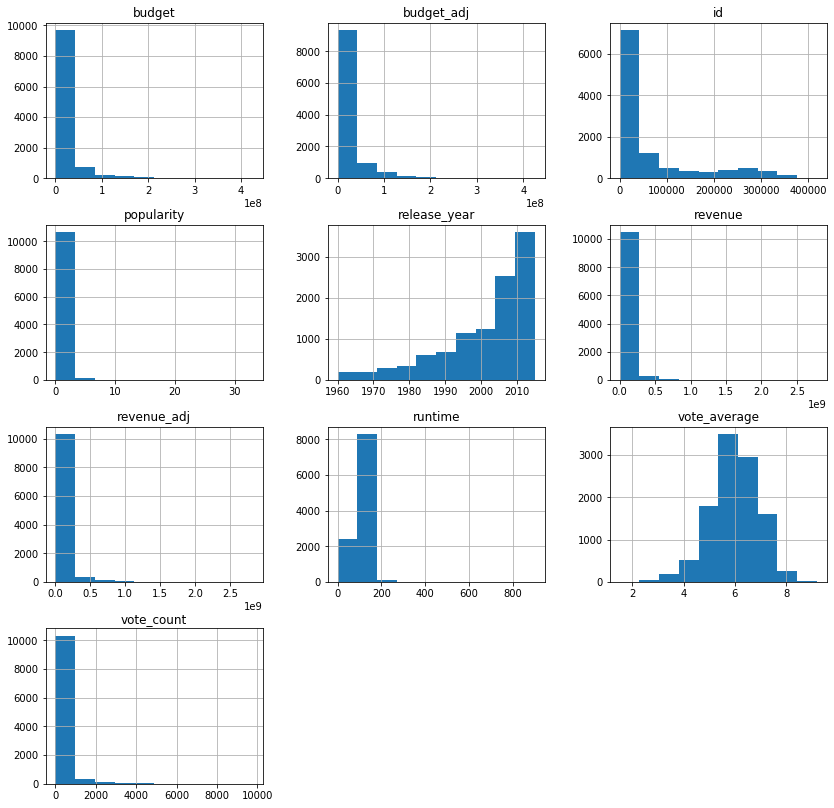

In [154]:
#Visualize the dataset using the hist function
tmdb.hist(figsize=(14,14));

In [155]:
#Describe the dataset - get means, counts and other statistical data
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Initial Findings

Luckily for us, all column names are named consistently but there seem to be various column values that may have a problem and need cleaning. Some of the columns (listed below) have values separated by '|', that need to be separated out. Most other columns that have a '|' may not be needed in our analysis and will be dropped and hence not mentioned below.

<ul>
<li>genres</li>
</ul>

Also, some of the columns that may not be needed for our analysis based on the questions being answered can be dropped. The list of columns are below:
    
<ul>
<li>budget</li>
<li>cast</li>
<li>homepage</li>
<li>director</li>
<li>tagline</li>
<li>keywords</li>
<li>overview</li>
<li>production_companies</li>
</ul>

### Dealing with 0 values
Upon investigating the dataset, there are some column values that have 0s in the amounts that will need to be cleaned up.

<ul>
<li>budget_adj</li>
<li>revenue_adj</li>
<li>runtime</li>
</ul>

## Data Cleaning

In [156]:
### Drop Columns that are not needed
tmdb.drop(['budget', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies'], inplace=True, axis=1)

tmdb.columns

Index(['id', 'imdb_id', 'popularity', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

### Replace 0 values in columns with means
The values in the columns budget_adj, revenue_adj and runtime have 0s and will need to be replaced with the mean within each of those columns.

In [157]:
#Find mean for budget_adj field
tmdb['budget_adj'] = tmdb['budget_adj'].replace(0, tmdb['budget_adj'].mean())
tmdb['revenue_adj'] = tmdb['revenue_adj'].replace(0, tmdb['revenue_adj'].mean())
tmdb['runtime'] = tmdb['runtime'].replace(0, tmdb['runtime'].mean())

#ReCheck if there are any 0 values in those 3 columns
print(np.count_nonzero(tmdb['budget_adj']) != tmdb.shape[0])
print(np.count_nonzero(tmdb['revenue_adj']) != tmdb.shape[0])
print(np.count_nonzero(tmdb['runtime']) != tmdb.shape[0])

False
False
False


In [158]:
#Describe the data after replacing the 0 values with means
tmdb.describe()

,id,popularity,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,3.982332e+07,102.362065,217.389748,5.974922,2001.322658,2.675136e+07,7.980243e+07
std,92130.136561,1.000185,1.170035e+08,30.902781,575.619058,0.935142,12.812941,3.050850e+07,1.365610e+08
min,5.000000,0.000065,0.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,1.755104e+07,5.136436e+07
50%,20669.000000,0.383856,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,1.755104e+07,5.136436e+07
75%,75610.000000,0.713817,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,5.136436e+07
max,417859.000000,32.985763,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Cleaning Data Types
We will need to check for wrong data types from the dataset

In [159]:
#Check the datatypes before conversion
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   runtime         10866 non-null  float64
 6   genres          10843 non-null  object 
 7   release_date    10866 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
 11  budget_adj      10866 non-null  float64
 12  revenue_adj     10866 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 1.1+ MB


In [160]:
#We note that the release date has a String data type - need to convert it to a date.
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'])

#Check the data types after conversion
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   imdb_id         10856 non-null  object        
 2   popularity      10866 non-null  float64       
 3   revenue         10866 non-null  int64         
 4   original_title  10866 non-null  object        
 5   runtime         10866 non-null  float64       
 6   genres          10843 non-null  object        
 7   release_date    10866 non-null  datetime64[ns]
 8   vote_count      10866 non-null  int64         
 9   vote_average    10866 non-null  float64       
 10  release_year    10866 non-null  int64         
 11  budget_adj      10866 non-null  float64       
 12  revenue_adj     10866 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(4), object(3)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - Which month is considered best for releasing movies and and does number of releases align with highest grossing months

In [161]:
# we will need to extract the month part from the release date column
tmdb['release_month'] = tmdb.release_date.apply(lambda m : m.month)

#check if the new column was created
tmdb.head(10)

,id,imdb_id,popularity,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,tt0369610,32.985763,1513528810,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,76341,tt1392190,28.419936,378436354,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,262500,tt2908446,13.112507,295238201,Insurgent,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,140607,tt2488496,11.173104,2068178225,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,168259,tt2820852,9.335014,1506249360,Furious 7,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4
5,281957,tt1663202,9.110700,532950503,The Revenant,156.0,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08,12
6,87101,tt1340138,8.654359,440603537,Terminator Genisys,125.0,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08,6
7,286217,tt3659388,7.667400,595380321,The Martian,141.0,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08,9
8,211672,tt2293640,7.404165,1156730962,Minions,91.0,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,6
9,150540,tt2096673,6.326804,853708609,Inside Out,94.0,Comedy|Animation|Family,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08,6


In [162]:
# Find the monthly revenue across the movies using group by
revenue_by_month = tmdb.select_dtypes('number').groupby('release_month').revenue_adj.sum()

revenue_by_month

release_month
1     4.910687e+10
2     4.235442e+10
3     6.385822e+10
4     5.487055e+10
5     8.423232e+10
6     1.021322e+11
7     7.987658e+10
8     5.757434e+10
9     6.804293e+10
10    7.424615e+10
11    8.171477e+10
12    1.091239e+11
Name: revenue_adj, dtype: float64

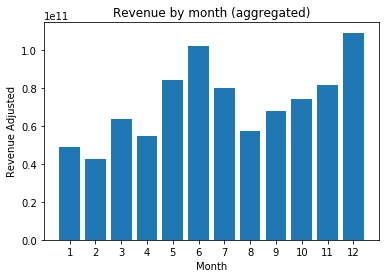

In [46]:
#Lets plot a histogram with the monthly data
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], revenue_by_month, tick_label= [1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('Revenue by month (aggregated)')
plt.xlabel('Month')
plt.ylabel('Revenue Adjusted');

In [163]:
# Find number of releases by month over the years
releases_by_month = tmdb.release_month.value_counts()

releases_by_month

9     1331
10    1153
12     985
1      919
8      918
6      827
3      823
11     814
5      809
7      799
4      797
2      691
Name: release_month, dtype: int64

In [164]:
# Find the mean of the movies released by month
tmdb.release_month.value_counts().mean()

905.5

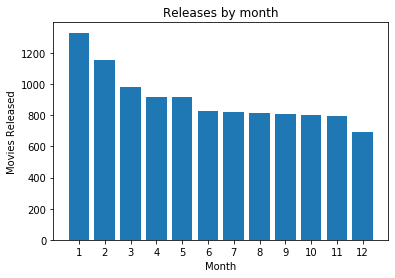

In [49]:
# Does having more releases contribute to higher revenues ?
# Lets plot a histogram with the monthly data
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], releases_by_month, tick_label= [1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('Releases by month')
plt.xlabel('Month')
plt.ylabel('Movies Released');

### Answer to Question 1 - Which month is considered best for releasing movies and does number of releases align with highest grossing months
From the analysis, it shows that movies released during Dec seem to have the highest revenue for the production companies. December is followed by June as the second highest grossing month. So, it makes sense to target the movie releases during those two months to see the maximum revenues. 

The second figure shows that even though Jan and Feb have the most number of releases, most of those releases do not result in higher revenues. It probably makes sense fot the production companies to produce fewer movies during those months and produce better movies towards June and Dec when the chances of their revenues go up. June and Dec releases seem to be closer to the mean of 905.

### Research Question 2  - Which genres have the highest revenues for their movies

In [165]:
#Some genres have a '|' delimiter within them, we need to first separate them into individual rows and then drop the original rows from the dataset

#Number of rows before
tmdb.shape[0]

#find the number of NaN or null values from the genres column
tmdb.genres.isnull().sum()

#drop the null genre columns from the dataset
tmdb.dropna(subset=['genres'], axis=0, inplace=True)

#Number of rows after
tmdb.shape[0]


10843

In [166]:
#Split the rows that have a '|' in the genres column value
genres_sep = tmdb['genres'].str.split('|', expand=True).rename(columns=lambda x:f"genres_{x+1}")

genres_sep.head()

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [167]:
# Drop the original rows from movie db dataframe
tmdb.drop(columns='genres', inplace=True)

In [168]:
#merge the two dataframes
tmdb.head()

tmdb = pd.merge(tmdb, genres_sep, left_index=True, right_index=True, how='inner')

tmdb.head()

,id,imdb_id,popularity,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,genres_1,genres_2,genres_3,genres_4,genres_5
0,135397,tt0369610,32.985763,1513528810,Jurassic World,124.0,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,378436354,Mad Max: Fury Road,120.0,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,295238201,Insurgent,119.0,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,2068178225,Star Wars: The Force Awakens,136.0,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,1506249360,Furious 7,137.0,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4,Action,Crime,Thriller,None,None


In [56]:
top_10_rev = tmdb.nlargest(10, 'revenue_adj')

top_10_rev

,id,imdb_id,popularity,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,genres_1,genres_2,genres_3,genres_4,genres_5
1386,19995,tt0499549,9.432768,2781505847,Avatar,162.0,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,12,Action,Adventure,Fantasy,Science Fiction,None
1329,11,tt0076759,12.037933,775398007,Star Wars,121.0,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,3,Adventure,Action,Science Fiction,None,None
5231,597,tt0120338,4.355219,1845034188,Titanic,194.0,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,11,Drama,Romance,Thriller,None,None
10594,9552,tt0070047,2.010733,441306145,The Exorcist,122.0,1973-12-26,1113,7.2,1973,3.928928e+07,2.167325e+09,12,Drama,Horror,Thriller,None,None
9806,578,tt0073195,2.563191,470654000,Jaws,124.0,1975-06-18,1415,7.3,1975,2.836275e+07,1.907006e+09,6,Horror,Thriller,Adventure,None,None
3,140607,tt2488496,11.173104,2068178225,Star Wars: The Force Awakens,136.0,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,Action,Adventure,Science Fiction,Fantasy,None
8889,601,tt0083866,2.900556,792910554,E.T. the Extra-Terrestrial,115.0,1982-04-03,1830,7.2,1982,2.372625e+07,1.791694e+09,4,Science Fiction,Adventure,Family,Fantasy,None
8094,1642,tt0113957,1.136610,1106279658,The Net,114.0,1995-07-28,201,5.6,1995,3.148127e+07,1.583050e+09,7,Crime,Drama,Mystery,Thriller,Action
10110,12230,tt0055254,2.631987,215880014,One Hundred and One Dalmatians,79.0,2061-01-25,913,6.6,1961,2.917944e+07,1.574815e+09,1,Adventure,Animation,Comedy,Family,None
4361,24428,tt0848228,7.637767,1519557910,The Avengers,143.0,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09,4,Science Fiction,Action,Adventure,None,None


In [169]:
#Lets group the genres by type and count their occurances in the top 10 dataset
copy_of_top_10_rev = top_10_rev.copy()

copy_of_top_10_rev.drop(columns=['id', 'imdb_id', 'popularity', 'revenue', 'original_title', 'runtime', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj', 'release_month'], inplace=True)

genres_top_10_rev = copy_of_top_10_rev.melt()

genres_top_10_rev.head()

,variable,value
0,genres_1,Action
1,genres_1,Adventure
2,genres_1,Drama
3,genres_1,Drama
4,genres_1,Horror


In [170]:
# Crosstab with genres
genres_counts_cross_tab = pd.crosstab(index=genres_top_10_rev['value'], columns=genres_top_10_rev['variable'])

genres_counts_cross_tab

variable,genres_1,genres_2,genres_3,genres_4,genres_5
value,,,,,
Action,2,2,0,0,1
Adventure,2,3,2,0,0
Animation,0,1,0,0,0
Comedy,0,0,1,0,0
Crime,1,0,0,0,0
Drama,2,1,0,0,0
Family,0,0,1,1,0
Fantasy,0,0,1,2,0
Horror,1,1,0,0,0


In [91]:
genres_counts_cross_tab['totals'] = genres_counts_cross_tab['genres_1'] + genres_counts_cross_tab['genres_2'] + genres_counts_cross_tab['genres_3'] + genres_counts_cross_tab['genres_4'] + genres_counts_cross_tab['genres_5']

genres_counts_cross_tab

variable,genres_1,genres_2,genres_3,genres_4,genres_5,totals
value,,,,,,
Action,2,2,0,0,1,5
Adventure,2,3,2,0,0,7
Animation,0,1,0,0,0,1
Comedy,0,0,1,0,0,1
Crime,1,0,0,0,0,1
Drama,2,1,0,0,0,3
Family,0,0,1,1,0,2
Fantasy,0,0,1,2,0,3
Horror,1,1,0,0,0,2


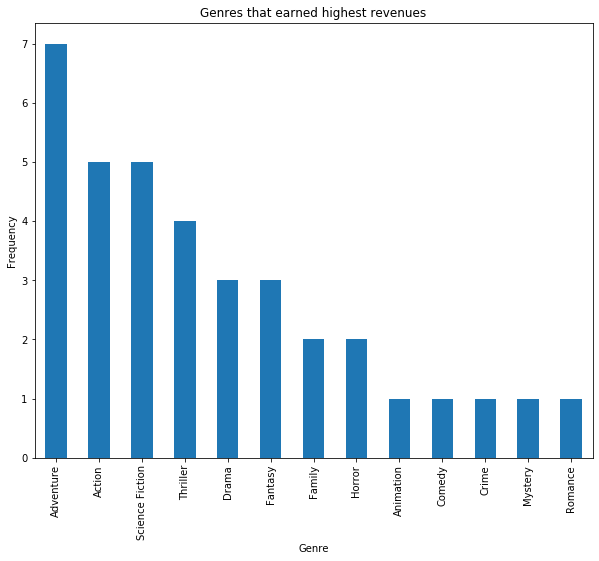

In [146]:
# Lets have a bar chart for this
genres_counts_cross_tab.sort_values('totals', ascending=False, inplace=True)
genres_counts_cross_tab['totals'].plot(kind='bar', figsize=(10,8))
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Genres that earned highest revenues');

### Answer to Question 2 - Which genres have the highest revenues for their movies
From the analysis, it shows that Adventure movies have the highest grossing revenues followed by Action and Sci-Fi, and then followed by Drama and Fantasy. So, this gives the production companies an idea about the kind of genres to focus on to see the maximum revenues.

### Research Question 3 - What are the top 5 genres in terms of the production of movies

In [171]:
# Lets take a copy of the tmdb dataframe and eliminate columns that are not needed for this analysis
copy_tmdb = tmdb.copy()
copy_tmdb.drop(columns=['id', 'imdb_id', 'popularity', 'revenue', 'original_title', 'runtime', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj', 'release_month'], inplace=True)
                           
copy_tmdb_melted = copy_tmdb.melt()    

In [176]:
genres_counts_cross_tab_2 = pd.crosstab(index=copy_tmdb_melted['value'], columns=copy_tmdb_melted['variable'])

genres_counts_cross_tab_2

variable,genres_1,genres_2,genres_3,genres_4,genres_5
value,,,,,
Action,1590,544,199,42,10
Adventure,586,626,183,62,14
Animation,403,207,80,6,3
Comedy,2319,990,388,81,15
Crime,381,449,350,152,23
Documentary,432,77,8,3,0
Drama,2453,1619,546,124,19
Family,144,448,401,178,60
Fantasy,272,304,190,109,41


In [105]:
genres_counts_cross_tab_2['totals'] = genres_counts_cross_tab_2['genres_1'] + genres_counts_cross_tab_2['genres_2'] + genres_counts_cross_tab_2['genres_3'] + genres_counts_cross_tab_2['genres_4'] + genres_counts_cross_tab_2['genres_5']

genres_counts_cross_tab_2

variable,genres_1,genres_2,genres_3,genres_4,genres_5,totals
value,,,,,,
Action,1590,544,199,42,10,2385
Adventure,586,626,183,62,14,1471
Animation,403,207,80,6,3,699
Comedy,2319,990,388,81,15,3793
Crime,381,449,350,152,23,1355
Documentary,432,77,8,3,0,520
Drama,2453,1619,546,124,19,4761
Family,144,448,401,178,60,1231
Fantasy,272,304,190,109,41,916


In [107]:
top_5_produced_genres = genres_counts_cross_tab_2.nlargest(5, 'totals')

top_5_produced_genres

variable,genres_1,genres_2,genres_3,genres_4,genres_5,totals
value,,,,,,
Drama,2453,1619,546,124,19,4761
Comedy,2319,990,388,81,15,3793
Thriller,491,961,886,450,120,2908
Action,1590,544,199,42,10,2385
Romance,186,704,583,194,45,1712


In [108]:
# Drop the top 5 from the genres_counts_cross_tab_2 dataframe
genres_counts_cross_tab_2.drop(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance'], inplace=True)

In [109]:
#Get the sum of the movies produced with the remaining genres
genres_counts_cross_tab_2['totals'].sum()

11401

In [113]:
# Add the remaining group to the end of the top 5 produced dataframe
counts_of_movie_genres = top_5_produced_genres.append({'totals':'11401'}, ignore_index=True)

counts_of_movie_genres

variable,genres_1,genres_2,genres_3,genres_4,genres_5,totals
0,2453.0,1619.0,546.0,124.0,19.0,4761
1,2319.0,990.0,388.0,81.0,15.0,3793
2,491.0,961.0,886.0,450.0,120.0,2908
3,1590.0,544.0,199.0,42.0,10.0,2385
4,186.0,704.0,583.0,194.0,45.0,1712
5,NaN,NaN,NaN,NaN,NaN,11401


In [114]:
# Show the right indexes with Genre Names

counts_of_movie_genres.index=['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Rest']

counts_of_movie_genres

variable,genres_1,genres_2,genres_3,genres_4,genres_5,totals
Drama,2453.0,1619.0,546.0,124.0,19.0,4761
Comedy,2319.0,990.0,388.0,81.0,15.0,3793
Thriller,491.0,961.0,886.0,450.0,120.0,2908
Action,1590.0,544.0,199.0,42.0,10.0,2385
Romance,186.0,704.0,583.0,194.0,45.0,1712
Rest,NaN,NaN,NaN,NaN,NaN,11401


In [123]:
# Fecth the totals of all movies across genres

counts_of_movie_genres['totals'] = pd.to_numeric(counts_of_movie_genres['totals'], errors='coerce')

#counts_of_movie_genres.info()
total_genres = counts_of_movie_genres['totals'].sum()

total_genres

26960

In [124]:
# Calculate the percentage of the top 5 genres against the totals
counts_of_movie_genres['pct'] = (counts_of_movie_genres.loc[:, 'totals'] / 26960) * 100

counts_of_movie_genres

variable,genres_1,genres_2,genres_3,genres_4,genres_5,totals,pct
Drama,2453.0,1619.0,546.0,124.0,19.0,4761,17.659496
Comedy,2319.0,990.0,388.0,81.0,15.0,3793,14.068991
Thriller,491.0,961.0,886.0,450.0,120.0,2908,10.786350
Action,1590.0,544.0,199.0,42.0,10.0,2385,8.846439
Romance,186.0,704.0,583.0,194.0,45.0,1712,6.350148
Rest,NaN,NaN,NaN,NaN,NaN,11401,42.288576


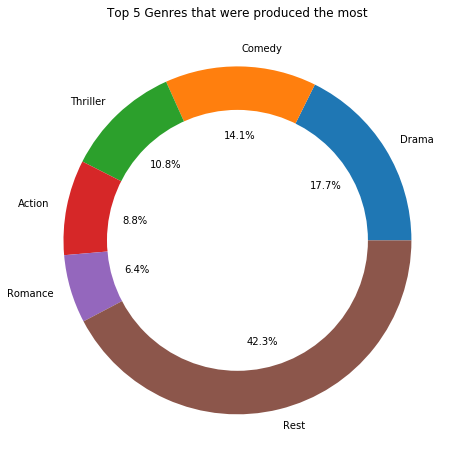

In [137]:
# Lets have a donut chart for this
counts_of_movie_genres['pct'].plot(kind='pie', figsize=(10,8), autopct='%1.1f%%')
plt.ylabel('')
circle = plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)
plt.title('Top 5 Genres that were produced the most');
plt.show()

### Answer to Question 3 - What are the top 5 genres in terms of the production of movies
From the analysis, it shows that even though Drama is not the top revenue grossing movie, it is produced the most followed by Comedy.

There seem to be several other movies that were made in other genres as the top 5 made genres probably accounted for half the number of movies made.

### Research Question 4 - Do runtime and vote count have a relationship with vote average

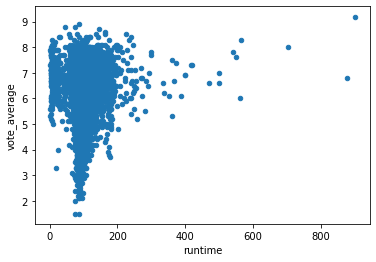

In [173]:
# Compare the all runtimes against vote average
tmdb_runtime = tmdb.loc[:, 'runtime': 'vote_average']
tmdb_runtime.plot(x='runtime', y='vote_average', kind='scatter');

In [142]:
# Display the correlation between vote count and vote average
tmdb_runtime.corr()

,runtime,vote_count,vote_average
runtime,1.000000,0.162531,0.155797
vote_count,0.162531,1.000000,0.254703
vote_average,0.155797,0.254703,1.000000


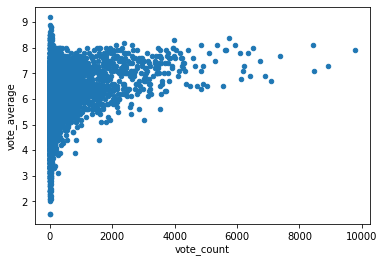

In [174]:
# Compare the all runtimes against vote average
tmdb_votecount = tmdb.loc[:, 'vote_count': 'vote_average']
tmdb_votecount.plot(x='vote_count', y='vote_average', kind='scatter');

In [144]:
# Display the correlation between vote count and vote average
tmdb_votecount.corr()

,vote_count,vote_average
vote_count,1.000000,0.254703
vote_average,0.254703,1.000000


### Answer to Question 4 - Do runtime and vote count have a relationship with vote average
From the runtime vs vote average analysis, there is a positive correlation, it shows that for shorter movies the vote average can increase by a smaller amount for lower runtimes. However, as the runtimes increase, the vote averages consistently go up.

From the vote count vs vote average analysis, there is a positive correlation, it shows that when the vote count is less than 2000, the vote average can go up by a small amount but as the number of votes go up, the vote average goes up by higher amounts.

<a id='conclusions'></a>
## Conclusions

As part of this analysis, I have tried to see the trends that the data showed to predict what types of movies were popular based on the time of release, type of genre it belonged to and their relationship to the revenues.

The conclusions show the following:
<ul>
<li>Releasing movies in June or December seem to make the most sense from a revenue generation aspect.</li>
<li>Releasing movies with Adventure and Action genres seem to make the most revenue</li>
<li>Most movies seem to be getting released within the Drama and Comedy genres</li>
<li>Shorter length movies and movies that receive fewer votes tend to have a rating that is not predictable but longer movies and movies with higher vote count receive better voting averages</li>
</ul>